In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        return int(train[train['Pclass']==Pclass].loc[:,'Age'].mean().round())
    return Age

train = pd.read_csv('titanic_train.csv')
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)
train.drop('Cabin', axis=1, inplace=True)
train.dropna(inplace=True)

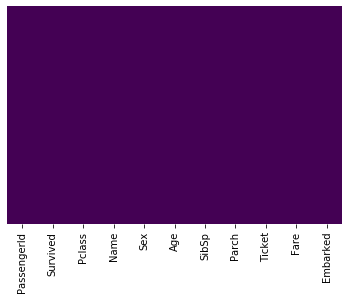

In [3]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [4]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)
train = pd.concat([train,sex,embark], axis=1)

In [5]:
train.drop(['Sex','Embarked','Name','Ticket'], axis=1, inplace=True)

In [6]:
train.drop(['PassengerId'],axis=1,inplace=True)

In [7]:
X = train.drop(['Survived'], axis=1)
y = train['Survived']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
logModel = LogisticRegression()

In [12]:
logModel.fit(X_train, y_train)

LogisticRegression()

In [13]:
predictions = logModel.predict(X_test)

In [14]:
from sklearn.metrics import classification_report

In [16]:
print(classification_report(y_test, predictions))

precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
confusion_matrix(y_test,predictions)

array([[150,  13],
       [ 32,  72]], dtype=int64)